In [88]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import OrdinalEncoder


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)


# Process 1

##  STEP 1: Load ALL Data
- Load the categorical, numerical, and target datasets.
- Merge them into a single dataframe.

In [2]:
categorical = pd.read_csv('files_for_lab/categorical.csv')
numerical = pd.read_csv('files_for_lab/numerical.csv')
target = pd.read_csv('files_for_lab/target.csv')

In [3]:
categorical

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,90,1,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,87,1,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,86,1,20,1,93,10,96,1,96,1,79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,27,H,M,3,L,G,C,C,2,96,1,0,2,96,2,96,2,96,2,96,2
95408,TX,24,H,M,3,L,F,A,C,1,96,1,50,1,96,3,96,3,96,3,96,3
95409,MI,30,H,M,3,L,E,B,C,3,95,1,38,1,96,3,95,1,96,10,94,10
95410,CA,24,H,F,2,L,F,A,C,1,86,1,40,5,90,11,96,8,97,1,86,12


In [4]:
categorical.isna().sum().sum()

0

In [5]:
numerical

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,16,2,0,0,1,28,8,31,11,38,62,8,74,22,0,0,0,0,0,2,2,1,21,19,24,6,61,65,73,59,70,56,78,62,82,99,4,10,5,2,6,12,0,1,9,5,18,20,5,7,6,0,11,33,4,3,2,12,3,3

In [6]:
numerical.isna().sum().sum()

0

In [7]:
numerical.describe()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
count,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.00000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.00000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.00000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,954

**Numerical Data Overview:**

- The dataset contains a large number of numerical features (316 in total).
- Many features have a wide range of values, such as TCODE and HIT.
- Some features like HPHONE_D seem binary in nature.

In [8]:
target

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [9]:
target.isna().sum().sum()

0

In [10]:
target['TARGET_B'].value_counts()

TARGET_B
0    90569
1     4843
Name: count, dtype: int64

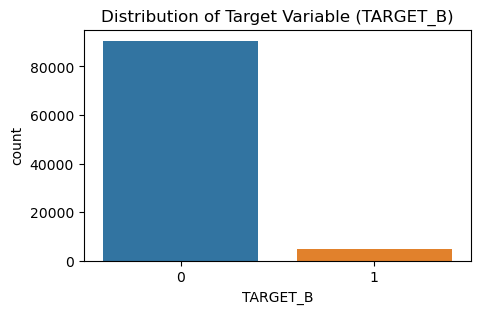

In [11]:
plt.figure(figsize=(5, 3))
sns.countplot(data=target, x='TARGET_B')
plt.title("Distribution of Target Variable (TARGET_B)")
plt.show()

In [12]:
assert len(categorical) == len(numerical) == len(target), "Dataframes have different lengths."

**Distribution of Target Variable**: The target variable TARGET_B is imbalanced, with the majority of entries being 0 (indicating no donation) and a smaller portion being 1 (indicating a donation).

In [13]:
data = pd.concat([numerical, categorical, target], axis=1)
combined_data = data.sample(frac=1)
combined_data

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
29348,1,47.000000,3,3,0,0,31,33,31,2,6,2,3,2524,858,1139,99,0,0,48,52,96,0,0,2,6,1,1,0,0,1,0,0,4,0,0,1,52,58,59,48,54,56,14,39,39,22,6,11,14,14,22,24,10,17,15,33,20,15,44,9,40,19,58,23,12,4,1,72,8,6,14,154,222,85,47,1,15,14,9,0,0,0,3531,3801,7,7,81,19,56,44,86,17,75,69,13,84,16,4,1,3,12,16,6,10,44,41,0,0,0,90,97,99,99,99,60,3,60,58,59,13,2,9,6,0,3,7,9,0,96,96,96,96,6780.0,577.0,804.0,744,880,812,902,50146,6,7,13,9,15,14,9,6,21,3,6,10,7,15,14,12,7,25,45,3,69,4,57,43,9,78,11,1,1,0,0,0,1,9,0,10,14,20,6,45,47,58,36,58,31,56,39,99,99,0,22,26,0,22,7,0,1,9,3,9,0,1,0,4,0,11,5,3,2,2,18,15,5,7,4,7,6,9,2,2,1,0,17,69,11,0,142,2,6,17,35,6,22,12,4,13,2,7,8,0,0,0,23,47,1,13,23,75,0,0,7,1,9,0,0,5,3,2,1,0,1,2,2,0,13,33,85,5,1,10,99,74,20,4,10,2,23,45,76,94,6,10,0,78,0,22,0,0,0,98,2,96,99,99,19,4,7,12,19,43,4,8,170.0,7,4,5.0,35.0,25.0,13,24.285714,173676,1,1,11,CA,38,H,M,1,L,G,A,T,2,86,1,51,1,87,7,92,4,95,11,87,7,0,0.0
41286,0,51.000000,5,3,3,2,12,15,40,11,0,2,3,4093,994,1574,99,0,0,49,51,69,2,0,20,21,0,1,1,6,10,1,0,10,0,1,10,31,37,40,33,41,45,24,38,41,20,15,28,22,14,8,7,6,17,15,33,21,14,21,8,16,29,28,42,28,11,5,49,12,7,33,173,259,14,8,4,85,81,75,0,0,0,2098,2230,6,6,12,88,95,5,0,34,63,47,27,81,19,7,2,5,21,26,7,14,44,11,0,1,0,56,85,94,99,99,13,29,4,32,32,14,8,32,54,0,8,9,70,0,81,95,97,99,4480.0,13.0,803.0,305,311,352,368,13564,26,15,17,18,16,5,1,1,1,28,12,17,18,15,7,1,1,1,14,24,28,21,78,22,36,71,16,5,5,0,0,0,5,3,0,5,26,31,8,75,61,71,52,61,48,33,26,46,67,25,9,21,5,11,24,0,2,6,0,12,8,1,1,0,0,8,19,2,1,6,12,17,6,2,2,7,4,10,4,11,0,2,5,77,6,0,120,12,17,25,21,6,15,5,4,27,1,20,10,1,2,0,7,12,1,15,21,40,22,0,2,0,3,0,0,3,2,0,0,0,1,1,0,0,56,25,34,13,19,34,84,38,6,2,18,0,29,49,54,68,32,6,9,81,5,13,0,0,1,99,0,98,99,98,12,2,4,6,23,61,6,14,79.0,13,7,3.0,10.0,10.0,3,6.076923,148022,0,2,31,CA,4,H,F,3,L,E,A,U,2,90,1,46,8,90,8,93,12,96,2,90,4,1,10.0
31916,0,64.000000,4,6,2,0,23,12,55,4,3,1,9,1543,314,893,99,0,0,40,60,97,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,40,47,51,46,52,54,14,48,35,16,8,24,15,9,7,12,25,19,22,30,17,12,45,34,45,56,28,16,8,3,1,39,11,

## Step 2: Create a Classification Model to Predict Donors.

- Split the data into train and test sets.
- Train a basic classification model (e.g., logistic regression).
- Evaluate the model's performance on the test set.

In [14]:
X = combined_data.drop(columns=['TARGET_B', 'TARGET_D'])
y = combined_data['TARGET_B']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape

((76329, 337), (19083, 337))

- Apply one-hot encoding to categorical variables.
- Scale numerical variables.
- Train a logistic regression model.

In [15]:
categorical_cols = [cname for cname in X_train.columns if 
                    X_train[cname].dtype == "object"]
categorical_cols

['STATE', 'HOMEOWNR', 'GENDER', 'RFA_2R', 'RFA_2A', 'GEOCODE2', 'DOMAIN_A']

In [16]:
numerical_cols = [cname for cname in X_train.columns if 
                  cname not in categorical_cols]
numerical_cols

['TCODE',
 'AGE',
 'INCOME',
 'WEALTH1',
 'HIT',
 'MALEMILI',
 'MALEVET',
 'VIETVETS',
 'WWIIVETS',
 'LOCALGOV',
 'STATEGOV',
 'FEDGOV',
 'WEALTH2',
 'POP901',
 'POP902',
 'POP903',
 'POP90C1',
 'POP90C2',
 'POP90C3',
 'POP90C4',
 'POP90C5',
 'ETH1',
 'ETH2',
 'ETH3',
 'ETH4',
 'ETH5',
 'ETH6',
 'ETH7',
 'ETH8',
 'ETH9',
 'ETH10',
 'ETH11',
 'ETH12',
 'ETH13',
 'ETH14',
 'ETH15',
 'ETH16',
 'AGE901',
 'AGE902',
 'AGE903',
 'AGE904',
 'AGE905',
 'AGE906',
 'AGE907',
 'CHIL1',
 'CHIL2',
 'CHIL3',
 'AGEC1',
 'AGEC2',
 'AGEC3',
 'AGEC4',
 'AGEC5',
 'AGEC6',
 'AGEC7',
 'CHILC1',
 'CHILC2',
 'CHILC3',
 'CHILC4',
 'CHILC5',
 'HHAGE1',
 'HHAGE2',
 'HHAGE3',
 'HHN1',
 'HHN2',
 'HHN3',
 'HHN4',
 'HHN5',
 'HHN6',
 'MARR1',
 'MARR2',
 'MARR3',
 'MARR4',
 'HHP1',
 'HHP2',
 'DW1',
 'DW2',
 'DW3',
 'DW4',
 'DW5',
 'DW6',
 'DW7',
 'DW8',
 'DW9',
 'HV1',
 'HV2',
 'HV3',
 'HV4',
 'HU1',
 'HU2',
 'HU3',
 'HU4',
 'HU5',
 'HHD1',
 'HHD2',
 'HHD3',
 'HHD4',
 'HHD5',
 'HHD6',
 'HHD7',
 'HHD8',
 'HHD9',
 'HHD

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)])

In [18]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LogisticRegression(max_iter=1000, random_state=42, verbose = 3))])

In [19]:
pipeline.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          355     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.29072D+04    |proj g|=  3.42905D+04


ITERATION     1

---------------- CAUCHY entered-------------------
 There are            0   breakpoints 

 GCP found in this segment
Piece      1 --f1, f2 at start point  -2.3710D+09  2.3710D+09
Distance to the stationary point =   1.0000D+00

---------------- exit CAUCHY----------------------

         355  variables are free at GCP            1
 LINE SEARCH           0  times; norm of step =   0.99999999999999989     

At iterate    1    f=  2.32008D+04    |proj g|=  1.19691D+04


ITERATION     2

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =   0.26200748558566989     

At iterate    2    f=  2.06408D+04    |proj g|=  8.72101D+03


ITERATION     3

--------

 LINE SEARCH           0  times; norm of step =    3.0421377948756156E-002

At iterate   36    f=  1.48555D+04    |proj g|=  3.80911D+01


ITERATION    37

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    3.9064573649982816E-002

At iterate   37    f=  1.48534D+04    |proj g|=  4.59519D+01


ITERATION    38

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    8.9006919461770778E-002

At iterate   38    f=  1.48493D+04    |proj g|=  4.86038D+01


ITERATION    39

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =    3.5738416159093310E-002

At iterate   39    f=  1.48481D+04    |proj g|=  5.58414D+01


ITERATION    40

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 LINE SEARCH           0  times; norm of step =    8.7905652544181846E-003

At iterate   73    f=  1.48150D+04    |proj g|=  1.60848D+01


ITERATION    74

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    4.2466789114169998E-002

At iterate   74    f=  1.48145D+04    |proj g|=  3.40326D+01


ITERATION    75

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    3.5438976982894707E-002

At iterate   75    f=  1.48140D+04    |proj g|=  2.17083D+01


ITERATION    76

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.6336522041135008E-002

At iterate   76    f=  1.48137D+04    |proj g|=  1.55455D+01


ITERATION    77

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 LINE SEARCH           0  times; norm of step =    2.9104543385563536E-002

At iterate  112    f=  1.48066D+04    |proj g|=  8.13448D+00


ITERATION   113

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.9479754943719469E-002

At iterate  113    f=  1.48064D+04    |proj g|=  8.80664D+00


ITERATION   114

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =    1.6221953066744194E-002

At iterate  114    f=  1.48063D+04    |proj g|=  1.51220D+01


ITERATION   115

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    2.0313020009303115E-002

At iterate  115    f=  1.48062D+04    |proj g|=  7.64141D+00


ITERATION   116

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 LINE SEARCH           0  times; norm of step =    1.3595096961387297E-002

At iterate  150    f=  1.48030D+04    |proj g|=  6.46794D+00


ITERATION   151

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.9842981856695981E-002

At iterate  151    f=  1.48029D+04    |proj g|=  5.80226D+00


ITERATION   152

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    2.1951216237032885E-002

At iterate  152    f=  1.48028D+04    |proj g|=  9.31608D+00


ITERATION   153

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    3.0095730698360419E-002

At iterate  153    f=  1.48028D+04    |proj g|=  1.46863D+01


ITERATION   154

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 LINE SEARCH           0  times; norm of step =    1.0346973487313497E-002

At iterate  187    f=  1.48012D+04    |proj g|=  6.12134D+00


ITERATION   188

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.1255498885112796E-002

At iterate  188    f=  1.48012D+04    |proj g|=  3.46728D+00


ITERATION   189

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    4.9118087931565094E-003

At iterate  189    f=  1.48012D+04    |proj g|=  4.75806D+00


ITERATION   190

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    4.3281603490354812E-003

At iterate  190    f=  1.48012D+04    |proj g|=  5.01937D+00


ITERATION   191

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 LINE SEARCH           1  times; norm of step =    1.1664756067506677E-002

At iterate  225    f=  1.48003D+04    |proj g|=  4.86452D+00


ITERATION   226

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    8.5231285966746416E-003

At iterate  226    f=  1.48003D+04    |proj g|=  3.88885D+00


ITERATION   227

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    4.4214643784327365E-003

At iterate  227    f=  1.48003D+04    |proj g|=  3.18084D+00


ITERATION   228

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    4.0164088941985737E-003

At iterate  228    f=  1.48003D+04    |proj g|=  2.75929D+00


ITERATION   229

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 LINE SEARCH           0  times; norm of step =    4.2687536092907161E-003

At iterate  260    f=  1.47998D+04    |proj g|=  3.49618D+00


ITERATION   261

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.9925430560003609E-003

At iterate  261    f=  1.47998D+04    |proj g|=  2.04589D+00


ITERATION   262

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.9495765439829233E-003

At iterate  262    f=  1.47998D+04    |proj g|=  2.66026D+00


ITERATION   263

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    7.7508322510028323E-003

At iterate  263    f=  1.47998D+04    |proj g|=  4.88955D+00


ITERATION   264

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 LINE SEARCH           0  times; norm of step =    6.8223050854786058E-003

At iterate  298    f=  1.47995D+04    |proj g|=  3.61385D+00


ITERATION   299

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    7.5739715043367422E-003

At iterate  299    f=  1.47995D+04    |proj g|=  3.22208D+00


ITERATION   300

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    9.5986971567927105E-003

At iterate  300    f=  1.47995D+04    |proj g|=  2.87177D+00


ITERATION   301

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.5016718092139246E-002

At iterate  301    f=  1.47995D+04    |proj g|=  2.22856D+00


ITERATION   302

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 LINE SEARCH           0  times; norm of step =    7.2550076162651023E-003

At iterate  333    f=  1.47992D+04    |proj g|=  2.34191D+00


ITERATION   334

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    4.5335552843187412E-003

At iterate  334    f=  1.47992D+04    |proj g|=  1.56136D+00


ITERATION   335

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    6.3882957331670067E-003

At iterate  335    f=  1.47992D+04    |proj g|=  1.80667D+00


ITERATION   336

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    5.9335037300260862E-003

At iterate  336    f=  1.47992D+04    |proj g|=  2.20781D+00


ITERATION   337

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 LINE SEARCH           1  times; norm of step =    2.6984584785435936E-003

At iterate  372    f=  1.47991D+04    |proj g|=  3.12008D+00


ITERATION   373

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    3.7061225993909345E-003

At iterate  373    f=  1.47991D+04    |proj g|=  1.79326D+00


ITERATION   374

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    3.9219939820910113E-003

At iterate  374    f=  1.47991D+04    |proj g|=  1.20059D+00


ITERATION   375

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    5.9068639398016454E-003

At iterate  375    f=  1.47991D+04    |proj g|=  1.24052D+00


ITERATION   376

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 LINE SEARCH           0  times; norm of step =    3.4966534418181083E-003

At iterate  411    f=  1.47990D+04    |proj g|=  1.28977D+00


ITERATION   412

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =    4.2025272521573750E-003

At iterate  412    f=  1.47990D+04    |proj g|=  1.88411D+00


ITERATION   413

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    2.4880751024381740E-003

At iterate  413    f=  1.47990D+04    |proj g|=  1.17799D+00


ITERATION   414

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    9.2531999530383823E-004

At iterate  414    f=  1.47990D+04    |proj g|=  1.16304D+00


ITERATION   415

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 LINE SEARCH           0  times; norm of step =    6.3879969745137390E-004

At iterate  449    f=  1.47990D+04    |proj g|=  6.58118D-01


ITERATION   450

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.1018914739394201E-003

At iterate  450    f=  1.47990D+04    |proj g|=  6.96555D-01


ITERATION   451

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.6363618610589627E-003

At iterate  451    f=  1.47990D+04    |proj g|=  6.91040D-01


ITERATION   452

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    4.4798634032486764E-003

At iterate  452    f=  1.47990D+04    |proj g|=  2.96393D+00


ITERATION   453

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 LINE SEARCH           0  times; norm of step =    6.0765447354285329E-003

At iterate  489    f=  1.47990D+04    |proj g|=  1.81828D+00


ITERATION   490

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    2.9030603232492149E-004

At iterate  490    f=  1.47990D+04    |proj g|=  5.77251D-01


ITERATION   491

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    4.2687086012940508E-004

At iterate  491    f=  1.47989D+04    |proj g|=  5.88523D-01


ITERATION   492

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.4861012116170395E-003

At iterate  492    f=  1.47989D+04    |proj g|=  7.36080D-01


ITERATION   493

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 LINE SEARCH           1  times; norm of step =    1.8703182869944173E-003

At iterate  529    f=  1.47989D+04    |proj g|=  8.43295D-01


ITERATION   530

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.5873410670404534E-003

At iterate  530    f=  1.47989D+04    |proj g|=  5.25169D-01


ITERATION   531

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.0656339257499963E-003

At iterate  531    f=  1.47989D+04    |proj g|=  6.48858D-01


ITERATION   532

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.1604115471451238E-003

At iterate  532    f=  1.47989D+04    |proj g|=  6.85732D-01


ITERATION   533

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 LINE SEARCH           0  times; norm of step =    1.6801489317293202E-003

At iterate  564    f=  1.47989D+04    |proj g|=  4.93863D-01


ITERATION   565

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    3.3283421079958494E-003

At iterate  565    f=  1.47989D+04    |proj g|=  8.03071D-01


ITERATION   566

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    4.4844363609187647E-004

At iterate  566    f=  1.47989D+04    |proj g|=  4.19044D-01


ITERATION   567

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    4.3309262158929712E-004

At iterate  567    f=  1.47989D+04    |proj g|=  3.72525D-01


ITERATION   568

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 LINE SEARCH           0  times; norm of step =    4.2969883971079184E-004

At iterate  603    f=  1.47989D+04    |proj g|=  4.26967D-01


ITERATION   604

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.5136788136738950E-003

At iterate  604    f=  1.47989D+04    |proj g|=  4.51368D-01


ITERATION   605

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    2.0505103928503848E-003

At iterate  605    f=  1.47989D+04    |proj g|=  8.75437D-01


ITERATION   606

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.5081747830608318E-003

At iterate  606    f=  1.47989D+04    |proj g|=  3.89410D-01


ITERATION   607

----------------SUBSM entered-----------------


----------------exit SUBSM ------

 LINE SEARCH           0  times; norm of step =    3.3048357375139743E-004

At iterate  638    f=  1.47989D+04    |proj g|=  2.27661D-01


ITERATION   639

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    3.2763936965605393E-004

At iterate  639    f=  1.47989D+04    |proj g|=  2.63761D-01


ITERATION   640

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    8.3926662724249088E-004

At iterate  640    f=  1.47989D+04    |proj g|=  6.40956D-01


ITERATION   641

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    7.6536700137866864E-004

At iterate  641    f=  1.47989D+04    |proj g|=  3.12591D-01


ITERATION   642

----------------SUBSM entered-----------------


----------------exit SUBSM ------

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['TCODE', 'AGE', 'INCOME',
                                                   'WEALTH1', 'HIT', 'MALEMILI',
                                                   'MALEVET', 'VIETVETS',
                                                   'WWIIVETS', 'LOCALGOV',
                                                   'STATEGOV', 'FEDGOV',
                                                   'WEALTH2', 'POP901',
                                                   'POP902', 'POP903',
                                                   'POP90C1', 'POP90C2',
                                                   'POP90C3', 'POP90C4',
                                                   'POP90C5', 'ETH1', 'ETH2',
                                                   'ETH3', 'ETH4', 'ETH5',
                                                   'ETH6', 'ETH7', 'ETH8',
                                                   'ETH9', ...]),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['STATE', 'HOMEOWNR',
                                                   'GENDER', 'RFA_2R', 'RFA_2A',
                                                   'GEOCODE2', 'DOMAIN_A'])])),
                ('model',
                 LogisticRegression(max_iter=1000, random_state=42,
                                    verbose=3))])

In [20]:
preds = pipeline.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, preds)
report = classification_report(y_test, preds)
conf_matrix = confusion_matrix(y_test, preds)

accuracy

0.9491694178064246

In [22]:
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18114
           1       0.00      0.00      0.00       969

    accuracy                           0.95     19083
   macro avg       0.47      0.50      0.49     19083
weighted avg       0.90      0.95      0.92     19083



In [23]:
conf_matrix

array([[18113,     1],
       [  969,     0]])

## DecisionTreeClassifier

In [25]:
%%time
tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', DecisionTreeClassifier(random_state=42))])


CPU times: user 22 µs, sys: 45 µs, total: 67 µs
Wall time: 69.9 µs


In [26]:
%%time
tree_pipeline.fit(X_train, y_train)

CPU times: user 25.3 s, sys: 359 ms, total: 25.6 s
Wall time: 25.7 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['TCODE', 'AGE', 'INCOME',
                                                   'WEALTH1', 'HIT', 'MALEMILI',
                                                   'MALEVET', 'VIETVETS',
                                                   'WWIIVETS', 'LOCALGOV',
                                                   'STATEGOV', 'FEDGOV',
                                                   'WEALTH2', 'POP901',
                                                   'POP902', 'POP903',
                                                   'POP90C1', 'POP90C2',
                                                   'POP90C3', 'POP90C4',
                                                   'POP90C5', 'ETH1', 'ETH2',
                                                   'ETH3', 'ETH4', 'ETH5',
                                                   'ETH6', 'ETH7', 'ETH8',
                                                   'ETH9', ...]),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['STATE', 'HOMEOWNR',
                                                   'GENDER', 'RFA_2R', 'RFA_2A',
                                                   'GEOCODE2', 'DOMAIN_A'])])),
                ('model', DecisionTreeClassifier(random_state=42))])

In [27]:
tree_preds = tree_pipeline.predict(X_test)

In [28]:
tree_accuracy = accuracy_score(y_test, tree_preds)
tree_report = classification_report(y_test, tree_preds)
tree_conf_matrix = confusion_matrix(y_test, tree_preds)

tree_accuracy

0.8919457108421108

In [29]:
print(tree_report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     18114
           1       0.06      0.08      0.07       969

    accuracy                           0.89     19083
   macro avg       0.51      0.51      0.51     19083
weighted avg       0.90      0.89      0.90     19083



In [30]:
tree_conf_matrix

array([[16945,  1169],
       [  893,    76]])

#### Class 0 vs. Class 1 Metrics

- The **precision**, **recall**, and **F1-score** for **class 0** are considerably higher than those for **class 1**.

#### Accuracy Assessment

- The **accuracy** is **0.89**, which might seem high at first glance. However, given the imbalanced nature of the dataset (18,114 samples of **class 0** vs. 969 samples of **class 1**), accuracy is not the best metric to evaluate the performance.

#### Macro Average

- The values for **macro avg** are around **0.50**, which suggests that the model is performing at a level close to random guessing when considering both classes equally.

#### Weighted Average

- The **weighted avg** values are closer to the metrics for **class 0** due to the class imbalance.


#### Class Imbalance

The dataset exhibits a significant class imbalance, with a majority of samples belonging to **class 0**. This class imbalance can have a substantial impact on the classifier's performance, potentially leading to a bias towards the majority class.

#### Model Performance

- For **class 0**, the model appears to perform well, showing high precision, recall, and F1-score.
- In contrast, the performance for **class 1** is noticeably poorer, with lower precision, recall, and F1-score.

It's essential to address this class imbalance issue to improve the model's performance on **class 1**.

# Random Forest

In [31]:
rfc_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', RandomForestClassifier(n_jobs=-1,random_state=42))])


In [32]:
%%time
rfc_pipeline.fit(X_train, y_train)

CPU times: user 1min 21s, sys: 674 ms, total: 1min 22s
Wall time: 11.9 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['TCODE', 'AGE', 'INCOME',
                                                   'WEALTH1', 'HIT', 'MALEMILI',
                                                   'MALEVET', 'VIETVETS',
                                                   'WWIIVETS', 'LOCALGOV',
                                                   'STATEGOV', 'FEDGOV',
                                                   'WEALTH2', 'POP901',
                                                   'POP902', 'POP903',
                                                   'POP90C1', 'POP90C2',
                                                   'POP90C3', 'POP90C4',
                                                   'POP90C5', 'ETH1', 'ETH2',
                                                   'ETH3', 'ETH4', 'ETH5',
                                                   'ETH6', 'ETH7', 'ETH8',
                                                   'ETH9', ...]),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['STATE', 'HOMEOWNR',
                                                   'GENDER', 'RFA_2R', 'RFA_2A',
                                                   'GEOCODE2', 'DOMAIN_A'])])),
                ('model', RandomForestClassifier(n_jobs=-1, random_state=42))])

In [33]:
%%time
rfc_preds = rfc_pipeline.predict(X_test)

CPU times: user 478 ms, sys: 87.5 ms, total: 565 ms
Wall time: 198 ms


In [34]:
frc_accuracy = accuracy_score(y_test, rfc_preds)
frc_report = classification_report(y_test, rfc_preds)
frc_conf_matrix = confusion_matrix(y_test, rfc_preds)

frc_accuracy

0.9488550018340932

In [35]:
print(frc_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18114
           1       0.00      0.00      0.00       969

    accuracy                           0.95     19083
   macro avg       0.47      0.50      0.49     19083
weighted avg       0.90      0.95      0.92     19083



In [36]:
frc_conf_matrix

array([[18107,     7],
       [  969,     0]])

## Step 3, 4. Deal with Imbalance (Oversampling), rerun the model

In [37]:
smote = SMOTE(random_state=42)

pipeline_with_smote = ImbPipeline([
    ('preprocessor', preprocessor),
    ('oversampler', smote),
    ('model', RandomForestClassifier(random_state=42, n_jobs=-1))
])

In [38]:
%%time
pipeline_with_smote.fit(X_train, y_train)

CPU times: user 3min 7s, sys: 2.21 s, total: 3min 9s
Wall time: 26.9 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['TCODE', 'AGE', 'INCOME',
                                                   'WEALTH1', 'HIT', 'MALEMILI',
                                                   'MALEVET', 'VIETVETS',
                                                   'WWIIVETS', 'LOCALGOV',
                                                   'STATEGOV', 'FEDGOV',
                                                   'WEALTH2', 'POP901',
                                                   'POP902', 'POP903',
                                                   'POP90C1', 'POP90C2',
                                                   'POP90C3', 'POP90C4',
                                                   'POP90C5', 'ETH1', 'ETH2',
                                                   'ETH3', 'ETH4', 'ETH5',
                                                   'ETH6', 'ETH7', 'ETH8',
                                                   'ETH9', ...]),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['STATE', 'HOMEOWNR',
                                                   'GENDER', 'RFA_2R', 'RFA_2A',
                                                   'GEOCODE2', 'DOMAIN_A'])])),
                ('oversampler', SMOTE(random_state=42)),
                ('model', RandomForestClassifier(n_jobs=-1, random_state=42))])

In [39]:
%%time
rfc_smote_preds = pipeline_with_smote.predict(X_test)

CPU times: user 520 ms, sys: 45.4 ms, total: 565 ms
Wall time: 157 ms


In [40]:
rfc_smote_accuracy = accuracy_score(y_test, rfc_smote_preds)
rfc_smote_report = classification_report(y_test, rfc_smote_preds)
rfc_smote_conf_matrix = confusion_matrix(y_test, rfc_smote_preds)

rfc_smote_accuracy

0.9488550018340932

In [41]:
print(rfc_smote_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18114
           1       0.00      0.00      0.00       969

    accuracy                           0.95     19083
   macro avg       0.47      0.50      0.49     19083
weighted avg       0.90      0.95      0.92     19083



In [42]:
rfc_smote_conf_matrix

array([[18107,     7],
       [  969,     0]])

## Step 5, 6: Feature Selection, rerun the model
- Use Recursive Feature Elimination (RFE) with cross-validation to rank features based on their importance.
- Visualize the feature rankings
- Train the model on the reduced feature set using the pipeline that includes feature selection.
- Evaluate the model's performance on the test set to see if there's an improvement after feature selection.


In [44]:
%%time

estimator = RandomForestClassifier(random_state=42, n_jobs=-1)

selector = RFECV(estimator=estimator, step=20, cv=5, verbose=3)

X_train_transformed = preprocessor.fit_transform(X_train)
selector = selector.fit(X_train_transformed, y_train)

ranking = selector.ranking_

Fitting estimator with 354 features.
Fitting estimator with 334 features.
Fitting estimator with 314 features.
Fitting estimator with 294 features.
Fitting estimator with 274 features.
Fitting estimator with 254 features.
Fitting estimator with 234 features.
Fitting estimator with 214 features.
Fitting estimator with 194 features.
Fitting estimator with 174 features.
Fitting estimator with 154 features.
Fitting estimator with 134 features.
Fitting estimator with 114 features.
Fitting estimator with 94 features.
Fitting estimator with 74 features.
Fitting estimator with 54 features.
Fitting estimator with 34 features.
Fitting estimator with 14 features.
Fitting estimator with 354 features.
Fitting estimator with 334 features.
Fitting estimator with 314 features.
Fitting estimator with 294 features.
Fitting estimator with 274 features.
Fitting estimator with 254 features.
Fitting estimator with 234 features.
Fitting estimator with 214 features.
Fitting estimator with 194 features.
Fittin

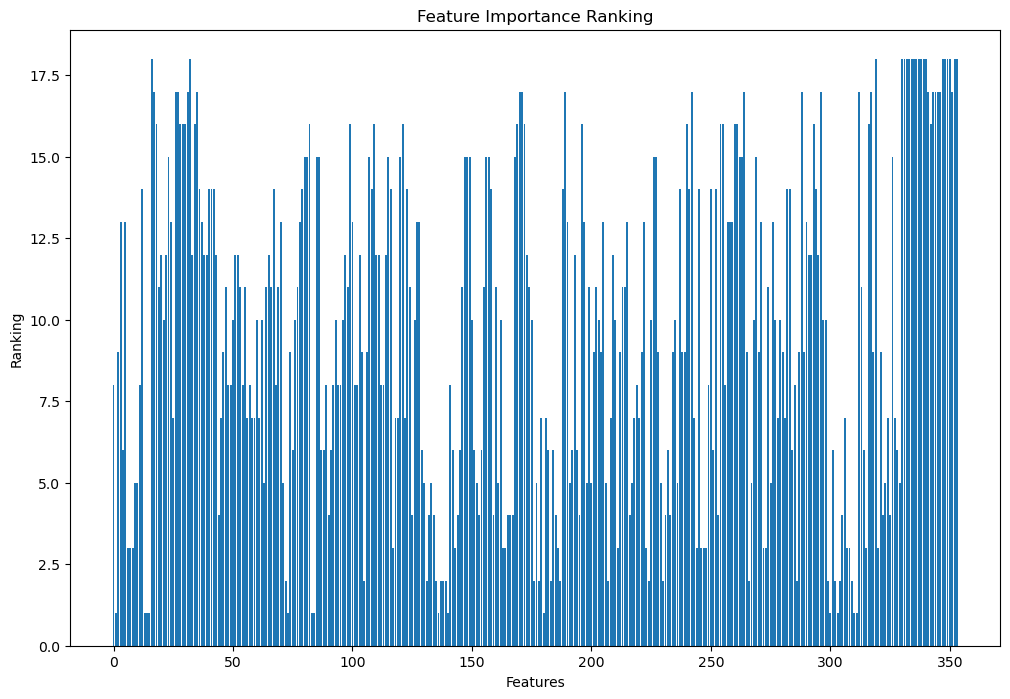

In [45]:
plt.figure(figsize=(12, 8))
plt.bar(range(len(ranking)), ranking)
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title('Feature Importance Ranking')
plt.show()

In [46]:
ranking

array([ 8,  1,  9, 13,  6, 13,  3,  3,  3,  5,  5,  8, 14,  1,  1,  1, 18,
       17, 16, 11, 12, 10, 12, 15, 13,  7, 17, 17, 16, 16, 16, 17, 18, 12,
       16, 17, 14, 13, 12, 12, 14, 14, 14, 12,  4,  7,  9, 11,  8,  8, 10,
       12, 12, 11,  8, 11,  7,  8,  7,  7, 10,  7, 10,  5, 11, 12, 11, 14,
        8, 11, 13,  5,  2,  1,  9,  6, 10, 11, 13, 14, 15, 15, 16,  1,  1,
       15, 15,  6,  6,  8,  4,  6,  8, 10,  8,  8, 10, 12, 11, 16, 13,  8,
        8, 12,  9,  2,  9, 15, 14, 16, 12, 12,  8,  8, 12, 15, 14,  3,  7,
        7, 15, 16,  7, 14, 11,  4, 10, 13, 13,  6,  5,  2,  4,  5,  4,  2,
        1,  2,  2,  2,  1,  8,  6,  3,  4,  6, 11, 15, 15, 15, 10,  6,  5,
        4,  6, 11, 15, 15, 14,  4, 11,  5, 10,  3,  3,  4,  4,  4, 15, 16,
       17, 17, 16, 12, 11, 10,  2,  5,  2,  7,  1,  7,  6,  2,  6,  4,  3,
        2, 14, 17, 13,  5,  6, 12,  6,  4, 16, 13,  5, 11,  5,  9, 11, 10,
        9, 13,  5,  2,  7, 12, 10,  3,  9, 11, 11, 13,  4,  5,  7,  8,  7,
        9, 13,  3,  2, 10

In [52]:
important_features_indices = [i for i, rank in enumerate(ranking) if rank == 1]
important_features = [X_train.columns[i] for i in important_features_indices]
important_features

['AGE',
 'POP901',
 'POP902',
 'POP903',
 'HHP2',
 'HV1',
 'HV2',
 'IC1',
 'IC5',
 'TPE13',
 'NUMPROM',
 'RAMNTALL',
 'AVGGIFT',
 'CONTROLN']

In [60]:
%%time
X_train_transformed_selected = X_train_transformed[: ,important_features_indices]

model = RandomForestClassifier(random_state=42, n_jobs=-1, verbose = 3)
model.fit(X_train_transformed_selected, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.5s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=3)

In [61]:
X_test_transformed = preprocessor.fit_transform(X_test)

In [64]:
%%time
rfc_selected_preds = model.predict(X_test_transformed[: ,important_features_indices])

CPU times: user 452 ms, sys: 21.6 ms, total: 474 ms
Wall time: 82.6 ms


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [65]:
rfc_selected_accuracy = accuracy_score(y_test, rfc_selected_preds)
rfc_selected_report = classification_report(y_test, rfc_selected_preds)
rfc_selected_conf_matrix = confusion_matrix(y_test, rfc_selected_preds)

rfc_selected_accuracy

/Users/lilitdavidyan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lilitdavidyan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lilitdavidyan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9492218204684798

In [68]:
print(rfc_selected_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18114
           1       0.00      0.00      0.00       969

    accuracy                           0.95     19083
   macro avg       0.47      0.50      0.49     19083
weighted avg       0.90      0.95      0.92     19083



In [69]:
rfc_selected_conf_matrix

array([[18114,     0],
       [  969,     0]])

In [70]:
%%time

selector2 = RFECV(estimator=estimator, step=20, cv=5, verbose=3)

pipeline_with_selection = ImbPipeline([
    ('preprocessor', preprocessor),
    ('oversampler', smote),
    ('feature_selector', selector2),
    ('model', RandomForestClassifier(random_state=42, n_jobs=-1, verbose = 3))
])

pipeline_with_selection.fit(X_train, y_train)

Fitting estimator with 354 features.
Fitting estimator with 334 features.
Fitting estimator with 314 features.
Fitting estimator with 294 features.
Fitting estimator with 274 features.
Fitting estimator with 254 features.
Fitting estimator with 234 features.
Fitting estimator with 214 features.
Fitting estimator with 194 features.
Fitting estimator with 174 features.
Fitting estimator with 154 features.
Fitting estimator with 134 features.
Fitting estimator with 114 features.
Fitting estimator with 94 features.
Fitting estimator with 74 features.
Fitting estimator with 54 features.
Fitting estimator with 34 features.
Fitting estimator with 14 features.
Fitting estimator with 354 features.
Fitting estimator with 334 features.
Fitting estimator with 314 features.
Fitting estimator with 294 features.
Fitting estimator with 274 features.
Fitting estimator with 254 features.
Fitting estimator with 234 features.
Fitting estimator with 214 features.
Fitting estimator with 194 features.
Fittin

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.3s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.4s finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['TCODE', 'AGE', 'INCOME',
                                                   'WEALTH1', 'HIT', 'MALEMILI',
                                                   'MALEVET', 'VIETVETS',
                                                   'WWIIVETS', 'LOCALGOV',
                                                   'STATEGOV', 'FEDGOV',
                                                   'WEALTH2', 'POP901',
                                                   'POP902', 'POP903',
                                                   'POP90C1', 'POP90C2',
                                                   'POP90C3', 'POP90C4',
                                                   'POP90C5', 'ETH1', 'ETH2',
                                                   'ETH3', 'ETH4', 'ETH5',
                                                   'ETH6', 'ETH7', 'ETH8',
                                                   'ETH9', ...]),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['STATE', 'HOMEOWNR',
                                                   'GENDER', 'RFA_2R', 'RFA_2A',
                                                   'GEOCODE2', 'DOMAIN_A'])])),
                ('oversampler', SMOTE(random_state=42)),
                ('feature_selector',
                 RFECV(cv=5,
                       estimator=RandomForestClassifier(n_jobs=-1,
                                                        random_state=42),
                       step=20, verbose=3)),
                ('model',
                 RandomForestClassifier(n_jobs=-1, random_state=42,
                                        verbose=3))])

In [71]:
%%time
tree_smote_select_preds = pipeline_with_selection.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s


CPU times: user 670 ms, sys: 51.5 ms, total: 721 ms
Wall time: 232 ms


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [72]:
tree_smote_select_accuracy = accuracy_score(y_test, tree_smote_select_preds)
tree_smote_select_report = classification_report(y_test, tree_smote_select_preds)
tree_smote_select_conf_matrix = confusion_matrix(y_test, tree_smote_select_preds)

tree_smote_select_accuracy

0.9488550018340932

In [73]:
print(tree_smote_select_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18114
           1       0.00      0.00      0.00       969

    accuracy                           0.95     19083
   macro avg       0.47      0.50      0.49     19083
weighted avg       0.90      0.95      0.92     19083



In [74]:
tree_smote_select_conf_matrix

array([[18107,     7],
       [  969,     0]])

In [76]:
%%time

selector2 = RFECV(estimator=estimator, step=20, cv=5, verbose=3)

pipeline_with_selection_with_params = ImbPipeline([
    ('preprocessor', preprocessor),
    ('oversampler', smote),
    ('feature_selector', selector2),
    ('model', RandomForestClassifier(random_state=42, 
                                     n_jobs=-1, 
                                     verbose = 3,
                                     max_depth=5,
                                     min_samples_split=20,
                                     min_samples_leaf =20,
                                     max_samples=0.8,
                                    ))
])

pipeline_with_selection_with_params.fit(X_train, y_train)

Fitting estimator with 354 features.
Fitting estimator with 334 features.
Fitting estimator with 314 features.
Fitting estimator with 294 features.
Fitting estimator with 274 features.
Fitting estimator with 254 features.
Fitting estimator with 234 features.
Fitting estimator with 214 features.
Fitting estimator with 194 features.
Fitting estimator with 174 features.
Fitting estimator with 154 features.
Fitting estimator with 134 features.
Fitting estimator with 114 features.
Fitting estimator with 94 features.
Fitting estimator with 74 features.
Fitting estimator with 54 features.
Fitting estimator with 34 features.
Fitting estimator with 14 features.
Fitting estimator with 354 features.
Fitting estimator with 334 features.
Fitting estimator with 314 features.
Fitting estimator with 294 features.
Fitting estimator with 274 features.
Fitting estimator with 254 features.
Fitting estimator with 234 features.
Fitting estimator with 214 features.
Fitting estimator with 194 features.
Fittin

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.8s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.5s finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['TCODE', 'AGE', 'INCOME',
                                                   'WEALTH1', 'HIT', 'MALEMILI',
                                                   'MALEVET', 'VIETVETS',
                                                   'WWIIVETS', 'LOCALGOV',
                                                   'STATEGOV', 'FEDGOV',
                                                   'WEALTH2', 'POP901',
                                                   'POP902', 'POP903',
                                                   'POP90C1', 'POP90C2',
                                                   'POP90C3', 'POP90C4',
                                                   'POP90C5', 'ETH1', 'ETH2',
                                                   'ETH3', 'ETH4', 'ETH5',
                                                   'ETH6', 'ETH7', 'ETH8',
                                                   'ETH9...
                                                  ['STATE', 'HOMEOWNR',
                                                   'GENDER', 'RFA_2R', 'RFA_2A',
                                                   'GEOCODE2', 'DOMAIN_A'])])),
                ('oversampler', SMOTE(random_state=42)),
                ('feature_selector',
                 RFECV(cv=5,
                       estimator=RandomForestClassifier(n_jobs=-1,
                                                        random_state=42),
                       step=20, verbose=3)),
                ('model',
                 RandomForestClassifier(max_depth=5, max_samples=0.8,
                                        min_samples_leaf=20,
                                        min_samples_split=20, n_jobs=-1,
                                        random_state=42, verbose=3))])

In [77]:
%%time
tree_smote_select_params_preds = pipeline_with_selection_with_params.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


CPU times: user 279 ms, sys: 67.1 ms, total: 347 ms
Wall time: 219 ms


[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [78]:
tree_smote_select_params_accuracy = accuracy_score(y_test, tree_smote_select_params_preds)
tree_smote_select_params_report = classification_report(y_test, tree_smote_select_params_preds)
tree_smote_select_params_conf_matrix = confusion_matrix(y_test, tree_smote_select_params_preds)

tree_smote_select_params_accuracy

0.8593512550437562

In [79]:
%%time
tree_smote_select_params_preds = pipeline_with_selection.predict(X_test)

CPU times: user 812 ms, sys: 66.4 ms, total: 878 ms
Wall time: 221 ms


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [80]:
print(tree_smote_select_params_report)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92     18114
           1       0.08      0.17      0.11       969

    accuracy                           0.86     19083
   macro avg       0.52      0.53      0.52     19083
weighted avg       0.91      0.86      0.88     19083



In [81]:
tree_smote_select_params_conf_matrix

array([[16232,  1882],
       [  802,   167]])

In [90]:
%%time

preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OrdinalEncoder(), categorical_cols)])

selector3 = RFECV(estimator=estimator, step=5, cv=3, verbose=3)


pipeline_step_5 = ImbPipeline([
    ('preprocessor', preprocessor2),
    ('oversampler', smote),
    ('feature_selector', selector3),
    ('model', RandomForestClassifier(random_state=42, 
                                     n_jobs=-1, 
                                     verbose = 3,
                                     max_depth=5,
                                     min_samples_split=20,
                                     min_samples_leaf =20,
                                     max_samples=0.8,
                                    ))
])

pipeline_step_5.fit(X_train, y_train)

Fitting estimator with 337 features.
Fitting estimator with 332 features.
Fitting estimator with 327 features.
Fitting estimator with 322 features.
Fitting estimator with 317 features.
Fitting estimator with 312 features.
Fitting estimator with 307 features.
Fitting estimator with 302 features.
Fitting estimator with 297 features.
Fitting estimator with 292 features.
Fitting estimator with 287 features.
Fitting estimator with 282 features.
Fitting estimator with 277 features.
Fitting estimator with 272 features.
Fitting estimator with 267 features.
Fitting estimator with 262 features.
Fitting estimator with 257 features.
Fitting estimator with 252 features.
Fitting estimator with 247 features.
Fitting estimator with 242 features.
Fitting estimator with 237 features.
Fitting estimator with 232 features.
Fitting estimator with 227 features.
Fitting estimator with 222 features.
Fitting estimator with 217 features.
Fitting estimator with 212 features.
Fitting estimator with 207 features.
F

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.1s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.5s finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['TCODE', 'AGE', 'INCOME',
                                                   'WEALTH1', 'HIT', 'MALEMILI',
                                                   'MALEVET', 'VIETVETS',
                                                   'WWIIVETS', 'LOCALGOV',
                                                   'STATEGOV', 'FEDGOV',
                                                   'WEALTH2', 'POP901',
                                                   'POP902', 'POP903',
                                                   'POP90C1', 'POP90C2',
                                                   'POP90C3', 'POP90C4',
                                                   'POP90C5', 'ETH1', 'ETH2',
                                                   'ETH3', 'ETH4', 'ETH5',
                                                   'ETH6', 'ETH7', 'ETH8',
                                                   'ETH9...
                                                  ['STATE', 'HOMEOWNR',
                                                   'GENDER', 'RFA_2R', 'RFA_2A',
                                                   'GEOCODE2', 'DOMAIN_A'])])),
                ('oversampler', SMOTE(random_state=42)),
                ('feature_selector',
                 RFECV(cv=3,
                       estimator=RandomForestClassifier(n_jobs=-1,
                                                        random_state=42),
                       step=5, verbose=3)),
                ('model',
                 RandomForestClassifier(max_depth=5, max_samples=0.8,
                                        min_samples_leaf=20,
                                        min_samples_split=20, n_jobs=-1,
                                        random_state=42, verbose=3))])

In [92]:
%%time
step_5_preds = pipeline_step_5.predict(X_test)

CPU times: user 155 ms, sys: 59.3 ms, total: 215 ms
Wall time: 161 ms


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [93]:
step_5_preds_accuracy = accuracy_score(y_test, step_5_preds)
step_5_preds_report = classification_report(y_test, step_5_preds)
step_5_preds_conf_matrix = confusion_matrix(y_test, step_5_preds)

step_5_preds_accuracy

0.8611853482156894

In [94]:
print(step_5_preds_report)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92     18114
           1       0.08      0.17      0.11       969

    accuracy                           0.86     19083
   macro avg       0.52      0.53      0.52     19083
weighted avg       0.91      0.86      0.88     19083



In [95]:
step_5_preds_conf_matrix

array([[16271,  1843],
       [  806,   163]])

## Step 7, 8. Encode and Scale ALL Data, Run classifier on ALL data

- Apply encoding to categorical data and scaling to numerical features on the entire dataset.
- Drop the same columns that were deemed unimportant during feature selection.
- Get predictions for every row in the dataset.

In [83]:
all_predictions = pipeline_with_selection.predict(X)

full_data_with_predictions = combined_data.copy()
full_data_with_predictions['Predicted_Target'] = all_predictions

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished


In [84]:
full_data_with_predictions

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D,Predicted_Target
29348,1,47.000000,3,3,0,0,31,33,31,2,6,2,3,2524,858,1139,99,0,0,48,52,96,0,0,2,6,1,1,0,0,1,0,0,4,0,0,1,52,58,59,48,54,56,14,39,39,22,6,11,14,14,22,24,10,17,15,33,20,15,44,9,40,19,58,23,12,4,1,72,8,6,14,154,222,85,47,1,15,14,9,0,0,0,3531,3801,7,7,81,19,56,44,86,17,75,69,13,84,16,4,1,3,12,16,6,10,44,41,0,0,0,90,97,99,99,99,60,3,60,58,59,13,2,9,6,0,3,7,9,0,96,96,96,96,6780.0,577.0,804.0,744,880,812,902,50146,6,7,13,9,15,14,9,6,21,3,6,10,7,15,14,12,7,25,45,3,69,4,57,43,9,78,11,1,1,0,0,0,1,9,0,10,14,20,6,45,47,58,36,58,31,56,39,99,99,0,22,26,0,22,7,0,1,9,3,9,0,1,0,4,0,11,5,3,2,2,18,15,5,7,4,7,6,9,2,2,1,0,17,69,11,0,142,2,6,17,35,6,22,12,4,13,2,7,8,0,0,0,23,47,1,13,23,75,0,0,7,1,9,0,0,5,3,2,1,0,1,2,2,0,13,33,85,5,1,10,99,74,20,4,10,2,23,45,76,94,6,10,0,78,0,22,0,0,0,98,2,96,99,99,19,4,7,12,19,43,4,8,170.0,7,4,5.0,35.0,25.0,13,24.285714,173676,1,1,11,CA,38,H,M,1,L,G,A,T,2,86,1,51,1,87,7,92,4,95,11,87,7,0,0.0,0
41286,0,51.000000,5,3,3,2,12,15,40,11,0,2,3,4093,994,1574,99,0,0,49,51,69,2,0,20,21,0,1,1,6,10,1,0,10,0,1,10,31,37,40,33,41,45,24,38,41,20,15,28,22,14,8,7,6,17,15,33,21,14,21,8,16,29,28,42,28,11,5,49,12,7,33,173,259,14,8,4,85,81,75,0,0,0,2098,2230,6,6,12,88,95,5,0,34,63,47,27,81,19,7,2,5,21,26,7,14,44,11,0,1,0,56,85,94,99,99,13,29,4,32,32,14,8,32,54,0,8,9,70,0,81,95,97,99,4480.0,13.0,803.0,305,311,352,368,13564,26,15,17,18,16,5,1,1,1,28,12,17,18,15,7,1,1,1,14,24,28,21,78,22,36,71,16,5,5,0,0,0,5,3,0,5,26,31,8,75,61,71,52,61,48,33,26,46,67,25,9,21,5,11,24,0,2,6,0,12,8,1,1,0,0,8,19,2,1,6,12,17,6,2,2,7,4,10,4,11,0,2,5,77,6,0,120,12,17,25,21,6,15,5,4,27,1,20,10,1,2,0,7,12,1,15,21,40,22,0,2,0,3,0,0,3,2,0,0,0,1,1,0,0,56,25,34,13,19,34,84,38,6,2,18,0,29,49,54,68,32,6,9,81,5,13,0,0,1,99,0,98,99,98,12,2,4,6,23,61,6,14,79.0,13,7,3.0,10.0,10.0,3,6.076923,148022,0,2,31,CA,4,H,F,3,L,E,A,U,2,90,1,46,8,90,8,93,12,96,2,90,4,1,10.0,1
31916,0,64.000000,4,6,2,0,23,12,55,4,3,1,9,1543,314,893,99,0,0,40,60,97,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,40,47,51,46,52,54,14,48,35,16,8,24,15,9,7,12,25,19,22,30,17,12,45,34,45,

## Step 9. Save Data with Predictions

In [85]:
full_data_with_predictions.to_csv('data_with_predictions.csv', index=False)

# EXTRA

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'model__n_estimators': randint(10, 200),
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth': [None] + list(randint(1, 20).rvs(5)),  
    'model__min_samples_split': randint(2, 11), 
    'model__min_samples_leaf': randint(1, 11), 
    'model__bootstrap': [True, False]
}


pipeline_for_random_search = ImbPipeline([
    ('preprocessor', preprocessor),
    ('oversampler', SMOTE(random_state=42)),
    ('feature_selector', RFECV(estimator=RandomForestClassifier(random_state=42, n_jobs=-1), step=10, cv=3)),
    ('model', RandomForestClassifier(random_state=42, n_jobs=-1))
])

random_search_classifier = RandomizedSearchCV(pipeline_for_random_search, param_distributions=param_dist, 
                                              n_iter=100, scoring='f1', 
                                              n_jobs=-1, cv=3, verbose=3, random_state=42)

random_search_classifier.fit(X_train, y_train)

print("Best hyperparameters:\n", random_search_classifier.best_params_)

best_classifier = random_search_classifier.best_estimator_


Fitting 3 folds for each of 100 candidates, totalling 300 fits
